# ANALIZA CZYNNIKÓW WPŁYWAJĄCYCH NA WYSTĄPIENIE CHORÓB SERCA

##    Wstęp

   ###### „To zdrowie jest prawdziwym bogactwem, a nie kawałki złota czy srebra.” – Mahatma Gandhi




Analizie został poddany jeden ze zbiorów danych dotyczący czynników mogących mieć wpływ na choroby serca ze strony https://archive.ics.uci.edu/ml/datasets/Heart+Disease. Zbiór danych składa się z 14 atrybutów.

Atrybuty wraz z opisem zostały zamieszczone w tabeli poniżej:

| Nazwa atrybutu | Opis |
|---|---|
| age | wiek w latach | 
| sex | płeć (1 = mężczyzna, 0 = kobieta) | 
| cp | rodzaj bólu w klatce piersiowej | 
| trestbps | spoczynkowe ciśnienie krwi | 
| chol | surowica cholesterol | 
| fbs | poziom cukru we krwi na czczo (1 = prawda, 0 = fałsz) | 
| restecg | spoczynkowe wyniki elektrokardiograficzne | 
| thalach | osiągnięte maksymalne tętno | 
| exang | dławica wysiłkowa (1 = tak, 0 = nie) | 
| oldpeak | obniżenie odcinka ST wywołane wysiłkiem fizycznym |
| slope | nachylenie szczytowego odcinka ST wysiłkowego (0 = wznoszenie, 1 = płasko, 2 = opadanie) |
| ca | liczba głównych naczyń (0-3) |
| thal | talasemia (0 = brak, 1 = normalny, 2 = naprawiona wada, 3 = odwracalna wada) |
| target | choroby serca (0 = nie, 1 = tak) |


## Przegląd danych

1. Importowanie bibliotek.

In [3]:
# podstawowe operacje
import numpy as np
import pandas as pd
import pandas_profiling

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# zaawansowane wizualizacje 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot


2. Załadowanie zbioru danych Heart.

In [7]:
# odczyt danych
data = pd.read_csv("C:/Users/Laptop/Documents/heart.csv")

# model danych
data.shape

(303, 14)

3. Wyświetlenie nazw kolumn.

In [12]:
# weryfikacja kolumn 
columns = data.columns.tolist()
print(columns)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


4. Wykonanie funkcji head(), która wyświetla 5 pierwszych wierszy ze zbioru danych.

In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


5. W celu zweryfikowania typów danych znajdujących się w każdej z kolumn, użyto polecenia dtypes. 

In [13]:
# odczyt typów danych

print(data.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


6. Aby zweryfikować, które kolumny zawierają puste wartości i jaka jest ich liczba, skorzystano z metody isnull().sum().

In [14]:
# weryfikacja pustych wartości

print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


W wynikach możemy zaobserwować, że w zbiorze danych Heart nie ma wartości pustych.

7. Wyświetlenie opisu danych za pomocą polecenia describe().

In [9]:
# opis danych

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


W wyniku możemy zauważyć wyświetlone parametry takie jak: liczba, średnia, odchylenie standardowe, wartości minimalna i maksymalna oraz kwartyle.

8. Przejrzenie wartości we wszystkich kolumnach.

In [15]:
data['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [16]:
data['sex'].unique()

array([1, 0], dtype=int64)

In [17]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [18]:
data['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [19]:
data['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

In [20]:
data['fbs'].unique()

array([1, 0], dtype=int64)

In [21]:
data['restecg'].unique()

array([0, 1, 2], dtype=int64)

In [22]:
data['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [23]:
data['exang'].unique()

array([0, 1], dtype=int64)

In [24]:
data['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [25]:
data['slope'].unique()

array([0, 2, 1], dtype=int64)

In [26]:
data['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [27]:
data['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [28]:
data['target'].unique()

array([1, 0], dtype=int64)

Po analizie wszystkich wartości w kolumnach możemy stwierdzić, że dane są prawidłowe i nie ma konieczności ich opracowania oraz wyczyszczenia zbioru danych.

## Wizualizacja danych

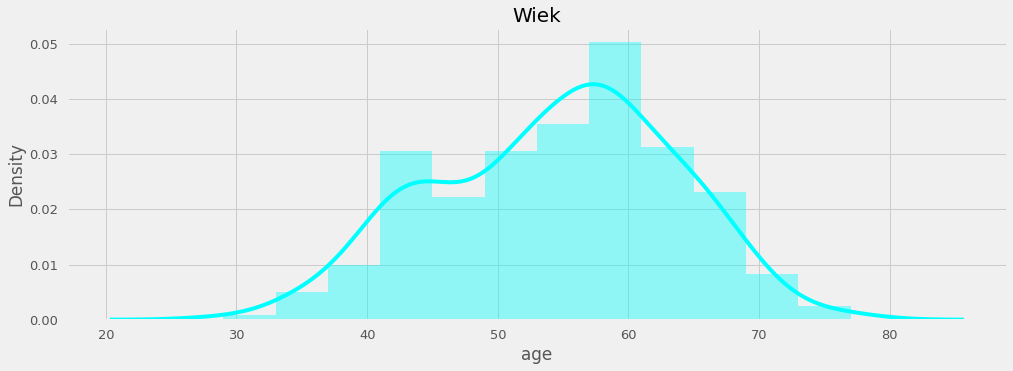

In [37]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['age'], color = 'cyan')
plt.title('Wiek', fontsize = 20)
plt.show()

Powyższy wykres przedstawia rozkład wieku wśród wszystkich wpisów w zbiorze danych dotyczących pacjentów z chorobami serca. Z wykresu wynika, że najwięcej osób cierpiących na choroby serca jest w grupie wiekowej 55-65 lat. Pacjenci w wieku 20-30 lat są najmniej narażeni na choroby serca.
W zbiorze danych liczba osób w grupie wiekowej 65-80 lat jest niska, stąd też rozkład jest mniejszy. Być może będziemy musieli zdecydować się na inne wykresy, aby uzyskać bardziej intuicyjne wyniki.

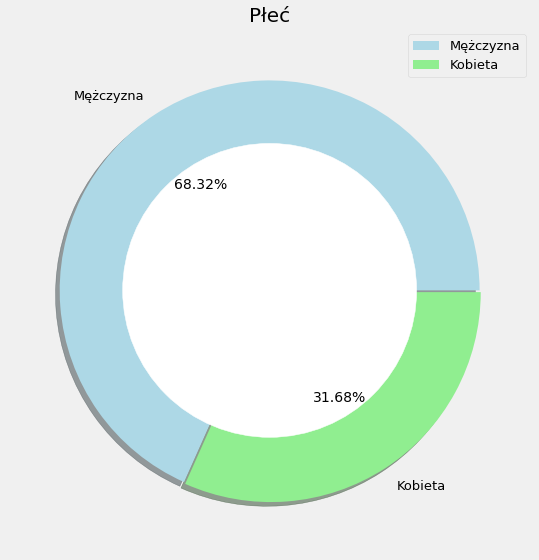

In [38]:
size = data['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Mężczyzna", "Kobieta"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Płeć', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

Powyższy wykres kołowy, ilustruje rozkład płci dotyczący chorób serca. Analizując wykres, można stwierdzić, że mężczyźni są dwukrotnie bardziej narażeni na wystąpienie chorób serca w porównaniu z kobietami.

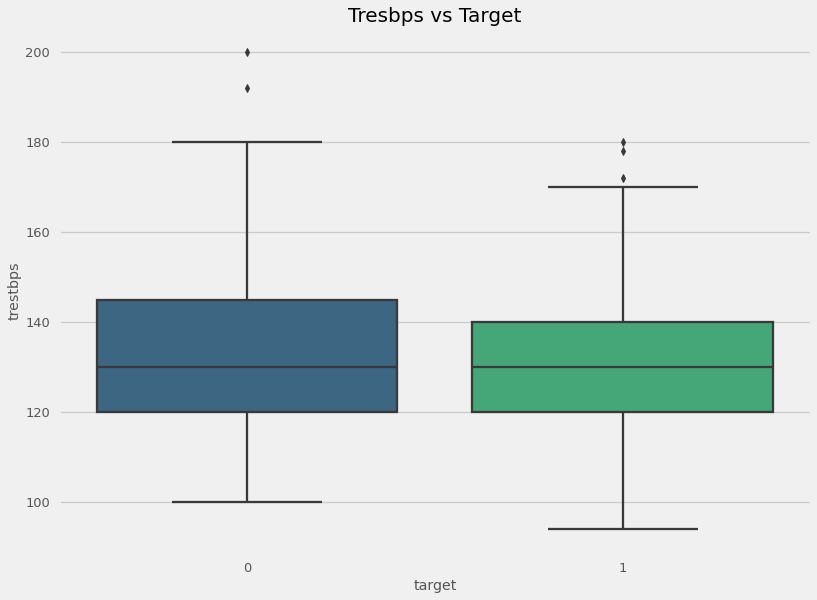

In [41]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(data['target'], data['trestbps'], palette = 'viridis')
plt.title('Tresbps vs Target', fontsize = 20)
plt.show()

Powyższy wykres przedstawia relację pomiędzy tresbps (spoczynkowe ciśnienie krwi pacjenta), a target (wartość docelowa określająca, czy pacjent cierpi na chorobę serca, czy nie). Analizując wykres możemy zauważyć, że pacjenci, którzy nie chorują, mają nieco wyższe ciśnienie krwi niż pacjenci z chorobami serca.

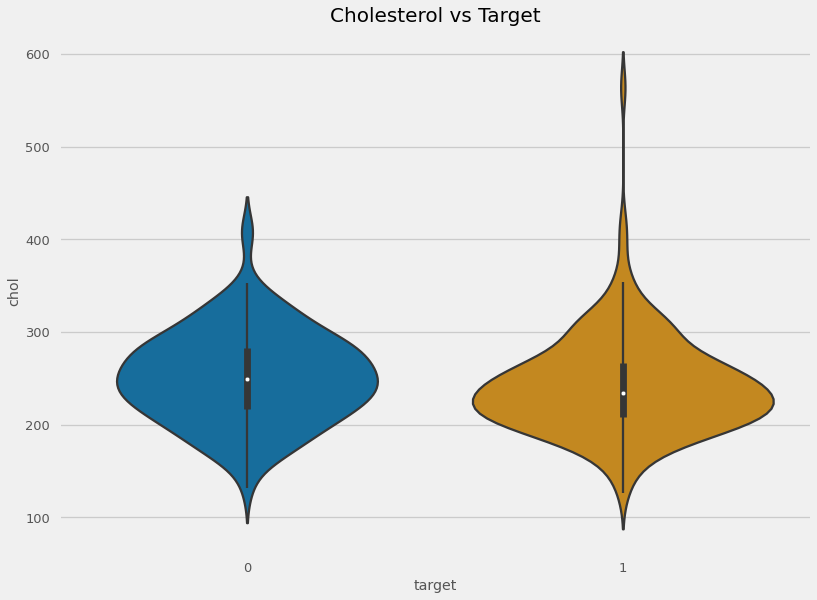

In [42]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(data['target'], data['chol'], palette = 'colorblind')
plt.title('Cholesterol vs Target', fontsize = 20, fontweight = 30)
plt.show()

Wykres ilustruje relację pomiędzy chol (poziom cholestrolu), a target (wartość docelowa określająca, czy pacjent cierpi na chorobę serca, czy nie). Możemy zauważyć, że pacjenci cierpiący na choroby serca mają wyższy poziom cholesterolu w porównaniu z pacjentami zdrowymi. Stąd następujący wniosek: Poziom cholestrolu odgrywa ważną rolę w identyfikowaniu chorób serca. 

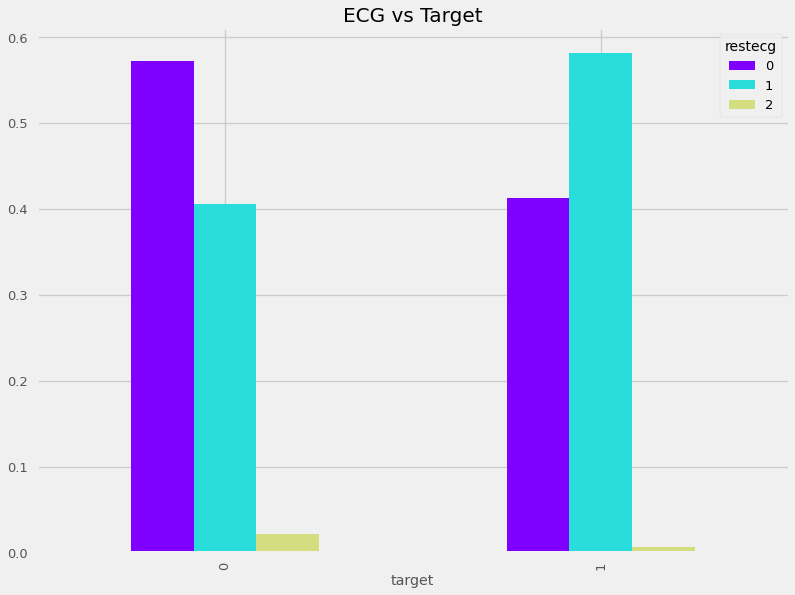

In [44]:
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(data['target'], data['restecg']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('ECG vs Target', fontsize = 20, fontweight = 30)
plt.show()

Powyższy wykres słupkowy przedstawia relację pomiędzy ECG ( spoczynkowe wyniki elektrokardiograficzne), a target (wartość docelowa określająca, czy pacjent cierpi na chorobę serca, czy nie). Wykres pokazuje, że największa liczba pacjentów, u których nie występuje prawdopodobieństwo chorób serca, ma wartość restscg 0, podczas gdy największa liczba osób, u których występuje prawdopodobieństwo chorób serca ma wartość restecg 1. 

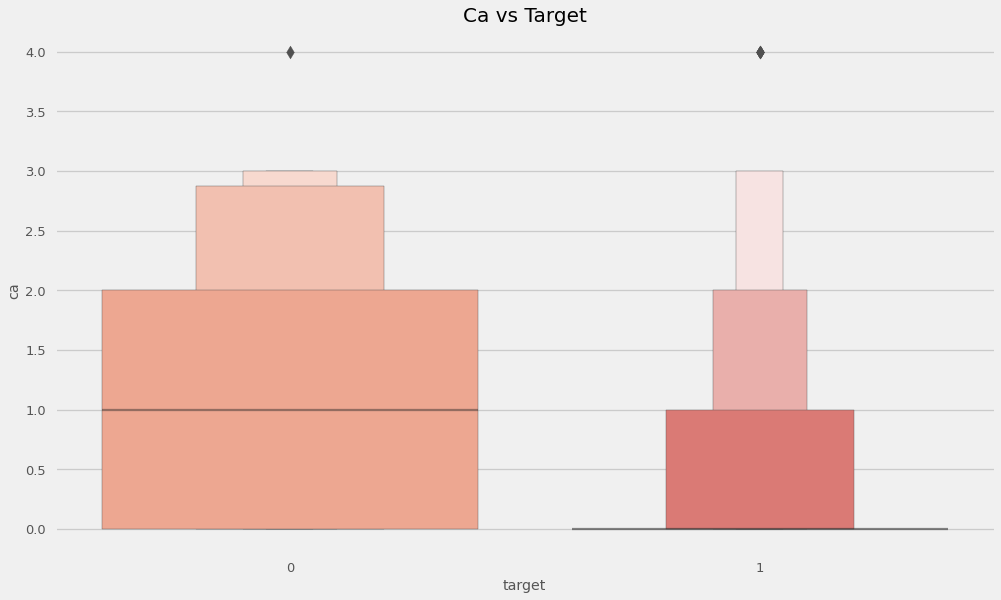

In [48]:
sns.boxenplot(data['target'], data['ca'], palette = 'Reds')
plt.title('Ca vs Target', fontsize = 20, fontweight = 30)
plt.show()

Powyższy wykres przedstawia relację pomiędzy ca (liczba głównych naczyń) a target(wartość docelowa określająca, czy pacjent cierpi na chorobę serca, czy nie). Wykres pokazuje, że pacjenci, którzy są bardziej narażeni na choroby serca, mają wysokie wartości głównych naczyń, podczas gdy pacjenci, którzy są mniej narażeni na jakiekolwiek choroby serca, mają bardzo niskie wartości głównych naczyń.Stąd też wniosek: w określaniu chorób serca znaczenie ma współczynnik określający wartość głównych naczyń, im więcej naczyń, tym większa szansa na choroby serca.

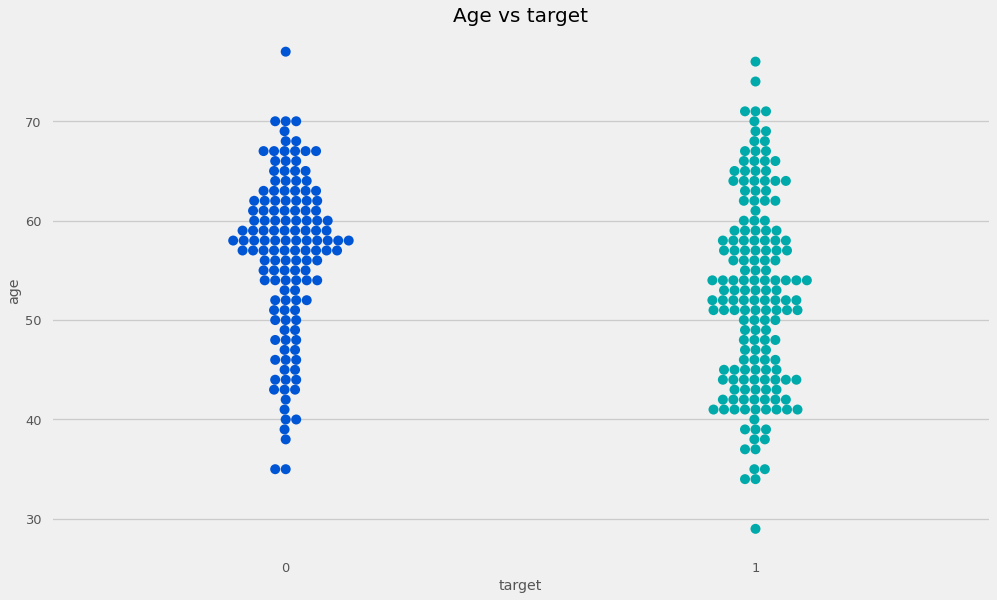

In [50]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.swarmplot(data['target'], data['age'], palette = 'winter', size = 10)
plt.title('Age vs target', fontsize = 20, fontweight = 30)
plt.show()

Wykres przedstawia relację pomiędzy age (wiek pacjenta), a target(wartość docelowa określająca, czy pacjent cierpi na chorobę serca, czy nie). Atrybut wiek nie jest dobrym atrybutem do określenia występowania chorób serca pacjenta, analizując ten wykres nie jesteśmy w stanie wykazać żadnych wniosków jakoby wiek miał wpływ za zachorowalność.

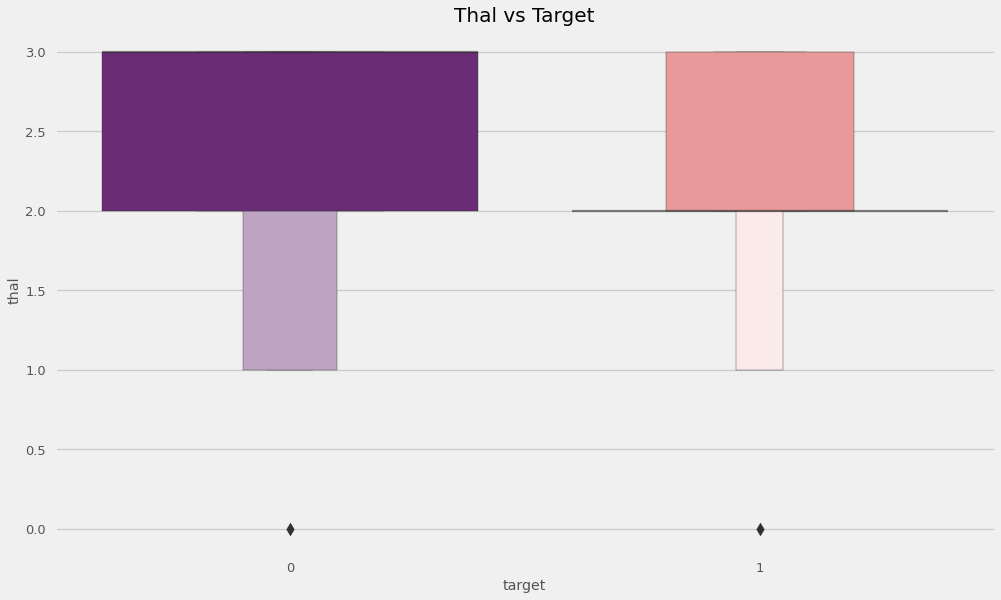

In [52]:
sns.boxenplot(data['target'], data['thal'], palette = 'magma')
plt.title('Thal vs Target', fontsize = 20, fontweight = 30)
plt.show()

Wykres przedstawia relację pomiędzy thal (zaburzenie krwi-talasemia), a target(wartość docelowa określająca, czy pacjent cierpi na chorobę serca, czy nie). Możemy wywnioskować, że pacjenci mający choroby serca posiadają mniejsze szanse na wystąpienie również talesemii w porównaniu z pacjentami, u których prawdopodobieństwo wystąpienia chorób serca jest mniejsze. 

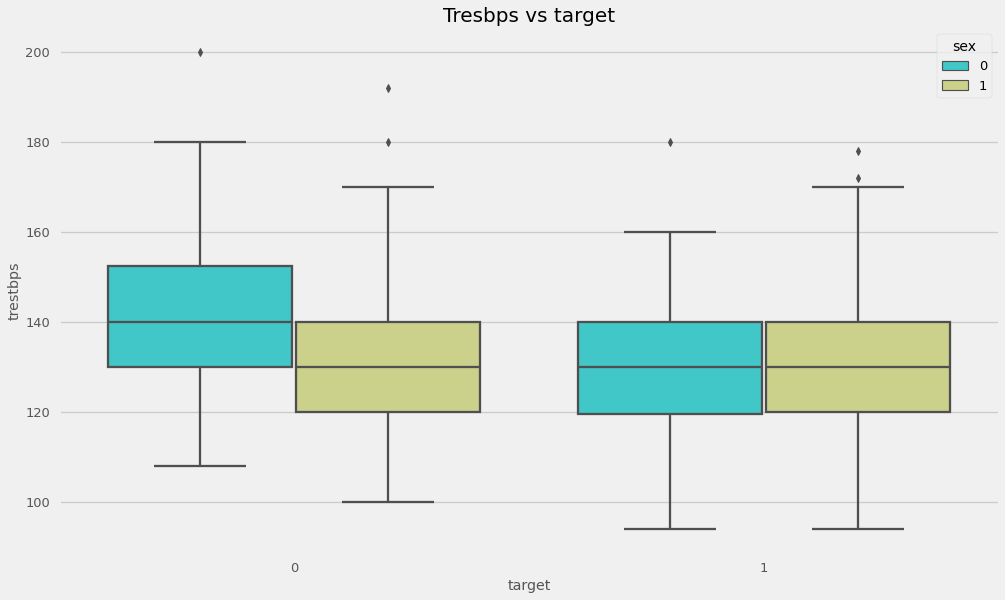

In [54]:
sns.boxplot(x = data['target'], y = data['trestbps'], hue = data['sex'], palette = 'rainbow')
plt.title('Tresbps vs target', fontsize = 20, fontweight = 30)
plt.show()

Na powyższym wykresie możemy zobaczyć relację pomiędzy tresbps (spoczynkowe ciśnienie krwi) a target (wartość docelowa określająca, czy pacjent cierpi na chorobę serca, czy nie) względem sex (płeć: 1-mężczyzna, 0-kobieta). Analizując wykres możemy stwierdzić, że kobiety mają wyższe spoczynkowe ciśnienie krwi niż mężczyźni w przypadku braku chorób serca, podczas gdy mężczyźni i kobiety mają prawie równe spoczynkowe ciśnienie krwi w przypadku posiadania chorób serca. Również w przypadku występujących chorób serca pacjenci mają nieco niższe spoczynkowe ciśnienie krwi w porównaniu z pacjentami, którzy nie chorują.

In [59]:
trace = go.Scatter3d(
    x = data['chol'],
    y = data['trestbps'],
    z = data['age'],
    name = 'Marvel',
    mode = 'markers',
    marker = dict(
         size = 10,
         color = data['age']
    )
)

df = [trace]

layout = go.Layout(
    title = 'Cholesterol vs Tętno vs Wiek',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Cholesterol'),
            yaxis = dict(title  = 'Tętno'),
            zaxis = dict(title  = 'Wiek')
        )
    
)
fig = go.Figure(data = df, layout=layout)
py.iplot(fig)

Jako inny przykład wizualizacji danych został użyty wykres 3D przedstawiający zależność pomiędzy wiekiem, tętnem a cholesterolem. Jest to rzadziej wykorzystywany wykres ponieważ nie zachowana zostaje czytelność danych oraz mamy do czynienia z małą możliwością porównywania poszczególnych elementów. 

#### BUBBLE CHART

In [36]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data, x_column = 'trestbps', y_column = 'chol', 
    bubble_column = 'sex', time_column = 'age', size_column = 'oldpeak', color_column = 'sex', 
    x_title = "Spoczynkowe ciśnienie krwi", y_title = "Cholesterol", title = 'BP vs Cholesterol vs Wiek vs Płeć vs Tętno',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

Powyższy wykres bąbelkowy przedstawia związek między płcią i obniżeniem odcinka ST a wskaźnikami cholesterolu i spoczynkowego ciśnienia krwi według wieku. 

## Podsumowanie

Powyższa analiza miała na celu określić, które czynniki mają największy wpływ na wystąpienie chorób serca.
Przeprowadzone badania wykazały, że cholesterol jest jednym z najważniejszych kryteriów wpływających na indentyfikację chorób serca u pacjentów. Kolejnym rozważanym kryterium, które wpływa na wystąpienie chorób serca jest współczynnik określający wartość głównych naczyń, im więcej naczyń, tym większa szansa na wystąpienie choroby serca.
Najmniej wiarygodnymi kryteriami identyfikującymi występowanie choroby serca są wiek oraz płeć. Jedynym pewnym wnioskiem dotyczącym wieku jest to, że pacjenci mający 20-30 lat są zdecydowanie najmniej narażeni na chorobę serca. Natomiast analizując płeć pacjentów możemy wysnuć wniosek, że większa zachorowalność jest wśród mężczyzn natomiast może być to spowodowane tym, że w analizowanym zbiorze 68% pacjentów to mężczyźni.
W powyższej analizie weryfikowaliśmy również prawdopodobieństwo wystąpienia talasemi (zaburzenia krwi) u osób chorych i zdrowych. Pacjenci mający choroby serca posiadają mniejsze szanse na wystąpienie również talesemii w porównaniu z pacjentami, u których prawdopodobieństwo wystąpienia chorób serca jest mniejsze.

Wykonała: Magda Dytkowicz